In [1]:
from openqaoa import QAOA
from pennylane import numpy as np

In [6]:
# Datos de prueba 

valores = [2,6,8,7,3,4,6]
pesos = [7,3,3,5,4,7,5]

pesoMaximo = 25

In [4]:
from qiskit_optimization.translators import from_docplex_mp
from docplex.mp.model import Model

In [10]:
mdl = Model(name="Knapsack")
N = len(valores)
x = {i: mdl.binary_var(name=f"x_{i}") for i in range(N)}
mdl.maximize(mdl.sum(valores[i] * x[i] for i in x))
mdl.add_constraint(mdl.sum(pesos[i] * x[i] for i in x) <= pesoMaximo)
op = from_docplex_mp(mdl)
print(op)
print(op.export_as_lp_string())

maximize 2*x_0 + 6*x_1 + 8*x_2 + 7*x_3 + 3*x_4 + 4*x_5 + 6*x_6 (7 variables, 1 constraints, 'Knapsack')
\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Knapsack

Maximize
 obj: 2 x_0 + 6 x_1 + 8 x_2 + 7 x_3 + 3 x_4 + 4 x_5 + 6 x_6
Subject To
 c0: 7 x_0 + 3 x_1 + 3 x_2 + 5 x_3 + 4 x_4 + 7 x_5 + 5 x_6 <= 25

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1
 0 <= x_4 <= 1
 0 <= x_5 <= 1
 0 <= x_6 <= 1

Binaries
 x_0 x_1 x_2 x_3 x_4 x_5 x_6
End



In [11]:
import networkx as nx
from openqaoa import QUBO

In [ ]:
QUBO(n=7, terms=valores, weights=pesos)

networkx_graph = utilities.graph_from_hamiltonian(qubo.hamiltonian)
nx.draw(networkx_graph, with_labels=True, node_color='yellow')

In [3]:

from openqaoa.problems import MinimumVertexCover
from openqaoa import QUBO

# g = networkx.circulant_graph(6, [1])
# vc = MinimumVertexCover(g, field=1.0, penalty=10)
# qubo_problem = vc.qubo

# mdl = Model(name="Knapsack")
# A = 10 * np.sum(valores)
# x = {i: mdl.binary_var(name=f"x_{i}") for i in range(len(valores))}
# mdl.maximize(mdl.sum(valores[i] * x[i] for i in x))
# mdl.add_constraint(mdl.sum(pesos[i] * x[i] for i in x) <= pesoMaximo)
# qubo_problem = from_docplex_mp(mdl)

# QUBO(n=7, terms=valores, weights=pesos)

TypeError: 'int' object is not iterable

In [15]:
q = QAOA()
q.compile(qubo_problem)
q.optimize()

AssertionError: The problem must be converted into QUBO form

In [5]:
q.result.optimized

{'angles': [0.366840183937, 0.383474229477],
 'cost': 14.167910014443,
 'measurement_outcomes': array([ 0.01947945-0.05307779j,  0.0241242 -0.06094078j,
         0.0241242 -0.06094078j,  0.06088739+0.02113005j,
         0.0241242 -0.06094078j, -0.02893663-0.09489956j,
         0.06088739+0.02113005j, -0.09446263-0.02304421j,
         0.0241242 -0.06094078j, -0.16821849-0.14520144j,
        -0.02893663-0.09489956j,  0.05549641+0.15159441j,
         0.06088739+0.02113005j,  0.05549641+0.15159441j,
        -0.09446263-0.02304421j, -0.00565476+0.1197448j ,
         0.0241242 -0.06094078j, -0.02893663-0.09489956j,
        -0.16821849-0.14520144j,  0.05549641+0.15159441j,
        -0.02893663-0.09489956j,  0.3170431 +0.01725587j,
         0.05549641+0.15159441j,  0.04783603+0.00371519j,
         0.06088739+0.02113005j,  0.05549641+0.15159441j,
         0.05549641+0.15159441j, -0.09144583-0.0465867j ,
        -0.09446263-0.02304421j,  0.04783603+0.00371519j,
        -0.00565476+0.1197448j ,  0

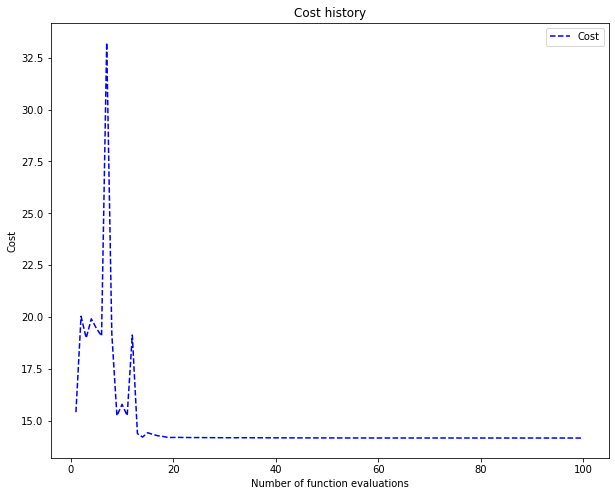

In [7]:
q.result.plot_cost()